In [1]:
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(H5weaver)
quiet_library(dplyr)
quiet_library(viridis)
# quiet_library(harmony)
# quiet_library(Nebulosa)

In [34]:
sp_merge <- readRDS(file = '../../Seurat_Objects/sp_merge_gating_celltype_updated.rds')

In [35]:
table(sp_merge$pbmc_sample_id)


PB00124-02 PB00127-02 PB00172-02 PB00173-02 PB00182-02 PB00192-02 PB00197-02 
     26775      27896       8380      11363      11434      11647      11590 
PB00323-02 PB00334-03 PB00353-03 PB00368-04 PB00377-03 PB00545-02 PB00593-04 
     12983      26343      27202      26345      26850      23381      10593 
PB00599-02 PB00807-02 
     26170      11466 

In [3]:
sp_merge <- SetIdent(sp_merge, value = 'gating_celltype')
sp_merge <- subset(sp_merge, idents = c('CD4 Unk','CD8 Unk'), invert = TRUE)

In [4]:
wnn_df <- as.data.frame(sp_merge@reductions$wnn.3.umap@cell.embeddings)
wnn_df$gating_celltype <- sp_merge$gating_celltype
head(wnn_df)

,wnn3umap_1,wnn3umap_2,gating_celltype
,<dbl>,<dbl>,<chr>
970c3f98e40811eba89d42010a19c839,-0.8019088,-5.895669,CD8 Naive
971b0bd6e40811eba89d42010a19c839,0.3050871,-5.484430,CD8 Naive
97267fdee40811eba89d42010a19c839,-0.3288510,-5.762752,CD8 Naive
9728e26ae40811eba89d42010a19c839,-0.7747660,-7.751556,CD8 Naive
97475100e40811eba89d42010a19c839,-0.3597772,-6.296741,CD8 Naive
97789738e40811eba89d42010a19c839,-1.9845226,-6.573844,CD8 Naive


## Cell type Density Plot

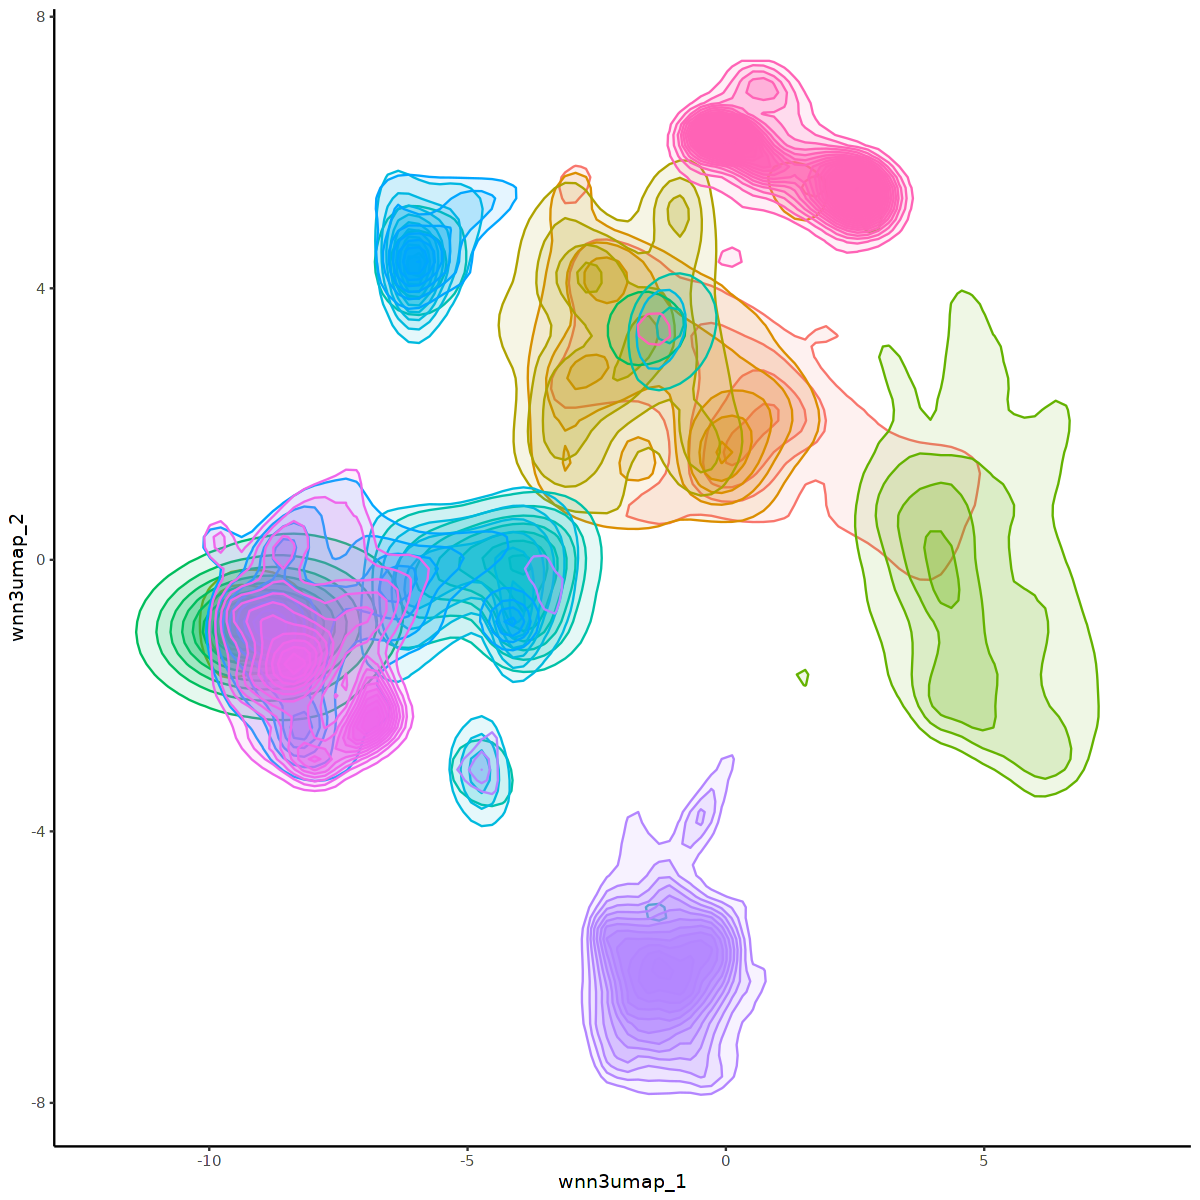

In [7]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(wnn_df, aes(x = wnn3umap_1, y = wnn3umap_2, color = gating_celltype)) + #geom_point(shape = ".") +
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 25) + xlim(-12,8) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(),axis.line = element_line(colour = "black"),
      legend.position = 'none') 

In [8]:
# Open a pdf file
pdf("plots/global_3WNN_density_umap.pdf", width = 10, height = 10) 
# 2. Create a plot
ggplot(wnn_df, aes(x = wnn3umap_1, y = wnn3umap_2, color = gating_celltype)) + #geom_point(shape = ".") +
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 25) + xlim(-12,8) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(),axis.line = element_line(colour = "black"),
      legend.position = 'none') 
# Close the pdf file
dev.off() 

png 
  2

# Fig 1b

## scRNA

In [42]:
scrna_samples <- read.csv('scRNAseq_cohort_TEAseq_followup_edit.csv')

In [43]:
scrna_samples$filler <- '1'
head(scrna_samples)

,Cohort,Subject.ID,Sex,Age,CMV.status,filler
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,BR1,BR1002,Male,29,Neg,1
2,BR1,BR1003,Female,31,Neg,1
3,BR1,BR1004,Male,31,Neg,1
4,BR1,BR1005,Female,28,Neg,1
5,BR1,BR1006,Male,32,Neg,1
6,BR1,BR1009,Female,27,Neg,1


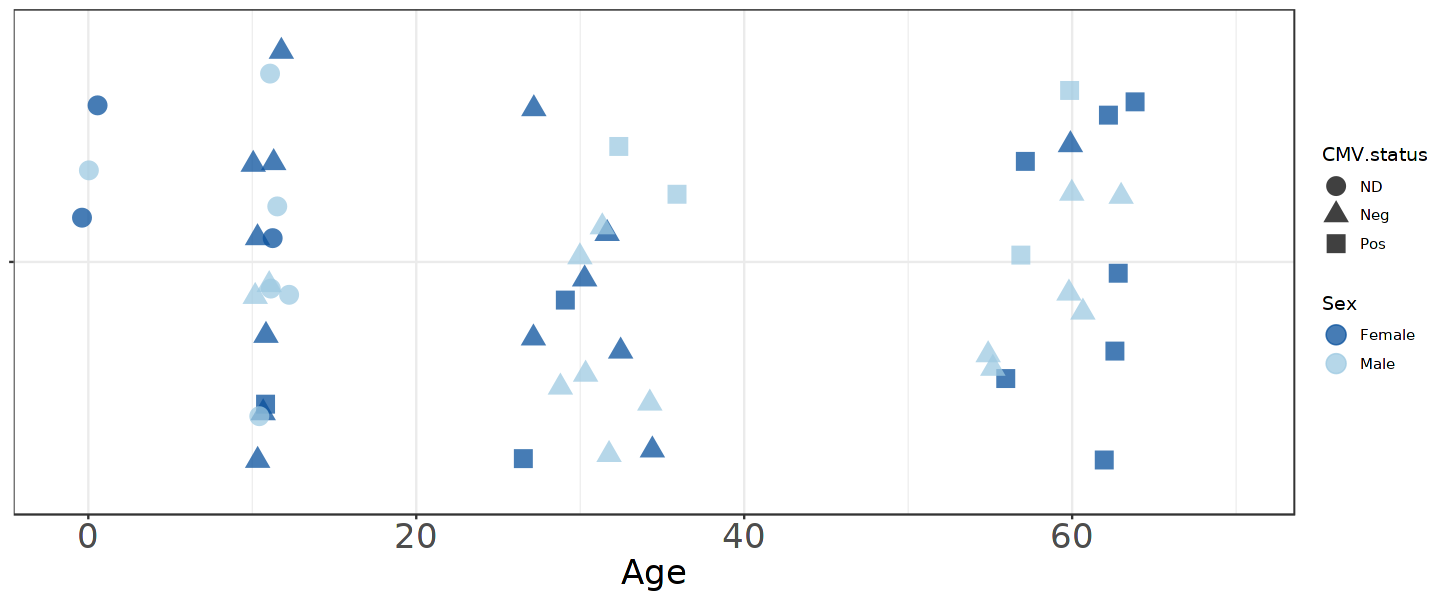

In [90]:
options(repr.plot.width = 12, repr.plot.height = 5)
p1 <- ggplot(scrna_samples, aes(x=Age, y=filler)) + geom_jitter(aes(color=Sex,shape=`CMV.status`), size=5, width=1, height=0.5, alpha=0.75) +
    scale_color_manual(values=c('#08519c','#9ecae1')) + xlim(-1,70) +
    theme_bw() + 
    theme(axis.text.x = element_text(size=20),
          axis.text.y = element_blank(),
          axis.title.y = element_blank(),
          axis.title.x = element_text(size=20),
          legend.position = 'right')
p1

In [92]:
# Open a pdf file
pdf("plots/scRNA_samples_plot.pdf", width = 12, height = 5) 
# 2. Create a plot
p1
# Close the pdf file
dev.off() 

png 
  2

## Flow/TEA

In [36]:
tea_samples <- read.csv('tea_flow_samples.csv')

In [37]:
tea_samples$filler <- '1'
head(tea_samples)

,Cohort,SubjectID,Sex,Age,CMV,filler
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,UP1,PB00124,Female,11,Pos,1
2,UP1,PB00127,Female,11,Neg,1
3,UP1,PB00172,Female,11,Pos,1
4,UP1,PB00173,Female,11,Pos,1
5,UP1,PB00182,Female,11,Neg,1
6,UP1,PB00192,Female,11,Neg,1


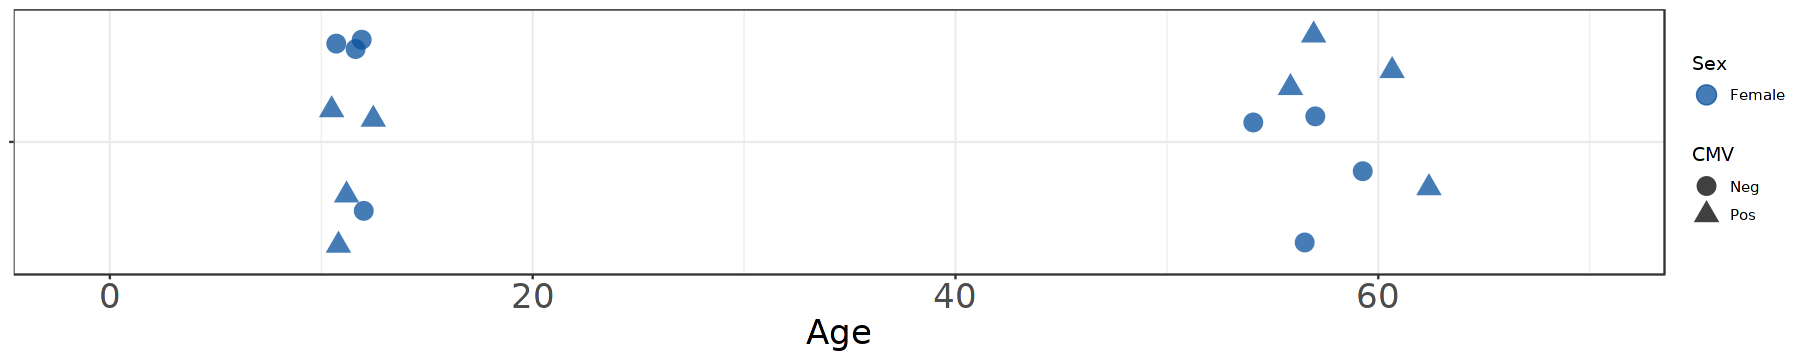

In [84]:
options(repr.plot.width = 15, repr.plot.height = 3)
p2 <- ggplot(tea_samples, aes(x=Age, y=filler)) + geom_jitter(aes(color=Sex,shape=CMV), size=5, width=1.5, height=0.5, alpha=0.75) +
    scale_color_manual(values=c('#08519c','#9ecae1')) + xlim(-1,70) +
    theme_bw() + 
    theme(axis.text.x = element_text(size=20),
          axis.text.y = element_blank(),
          axis.title.y = element_blank(),
          axis.title.x = element_text(size=20),
          legend.position = 'right')
p2

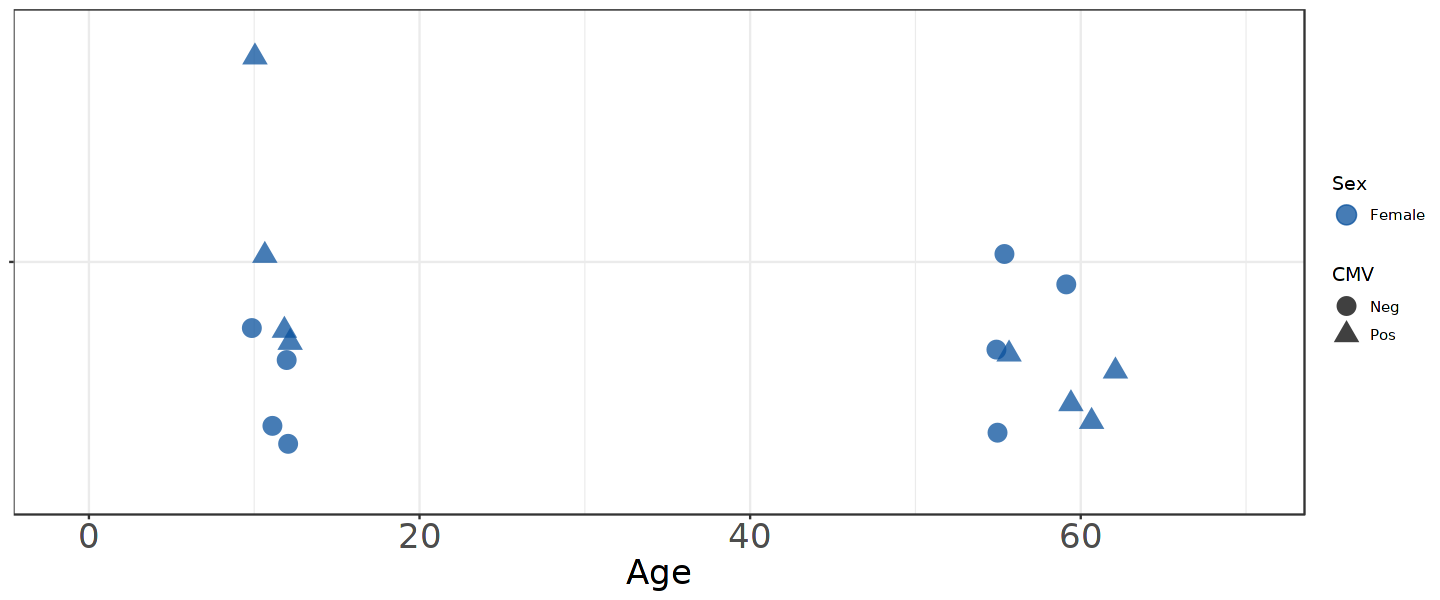

In [94]:
options(repr.plot.width = 12, repr.plot.height = 5)
p2

## TEA

In [95]:
# Open a pdf file
pdf("plots/TEA_samples_plot.pdf", width = 12, height = 5) 
# 2. Create a plot
p2
# Close the pdf file
dev.off() 

png 
  2